# House Rent Forecasting Using Machine Learning: A Lagos State Perspective

In the realm of real estate analytics, nurturing insights through house rent forecasting isn't merely a fiscal strategy; it's a blueprint for sustainable landlord-tenant relationships. A stitch in time, via predictive analytics powered by Machine Learning, saves on both vacancies and operational costs, laying the foundation for a lucrative rental portfolio.

# Introduction

Understanding the rental dynamics in Lagos State is pivotal for both landlords and tenants, enabling them to make informed decisions and fostering a harmonious real estate landscape. The volatile nature of rent fluctuations and market shifts poses intricate challenges for both tenants and property owners. Anticipating these changes, holds the potential to be a game-changer.

#### Optimizing Resource Allocation
The ability to foresee alterations in rental patterns equips stakeholders with a proactive advantage, enabling optimal resource allocation and enhancing financial stability. Retaining tenants and ensuring steady occupancy levels are the cornerstones of a thriving property investment.

#### Aim: Predicting House Rent Prices
This project predicts house rent trends using Machine Learning, contributing to a refined real estate landscape. By unraveling the patterns within rent data, this initiative strives to provide a predictive framework guiding strategic decisions. Ultimately, it aims to cultivate a more efficient and sustainable rental market in Lagos State, benefiting both landlords and tenants.

In [1]:
# load the necesaary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import plotly.io as pio
pio.renderers.default ='notebook'

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import ensemble

In [2]:
# loading dataset
eko2 = pd.read_csv("newlagosrent.csv")

eko2.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE_NEW
0,Ikoyi,15000000.0,2022-08-12,3,3,4,HOUSE
1,Ikoyi,10000000.0,2022-08-12,3,3,4,FLAT / APARTMENT
2,Ikoyi,50000000.0,2022-08-12,5,5,6,HOUSE
3,Ikoyi,10000000.0,2022-08-10,3,3,4,FLAT / APARTMENT
4,Ikoyi,14000000.0,2022-08-10,3,3,4,FLAT / APARTMENT


# Dataset Description

The dataset provides comprehensive real estate information for properties located in Lagos State, Nigeria. Each entry in the dataset represents a property listing, and various attributes offer detailed insights into the characteristics of these properties.

#### Property Details:

Location: Specifies the particular area within Lagos where the property is situated.  
Price: Represents the monetary value associated with the property listing, indicating the rental price.  
Date Added: Denotes the date when the property listing was added to the dataset.  
Bedrooms: Indicates the number of bedrooms present in the property.  
Bathrooms: Specifies the number of bathrooms within the property.  
Toilets: Represents the number of toilets available in the property.  
House Type New: Categorizes the type of property, encompassing options such as 'HOUSE', 'FLAT / APARTMENT', 'DETACHED DUPLEX', 'TERRACED DUPLEX', 'BLOCKS OF FLATS', 'MAISONETTE', 'PENTHOUSE', 'MINI FLAT', 'SELF CONTAIN', 'APARTMENT', 'DETACHED BUNGALOW', 'TERRACED BUNGALOW', 'BOYS QUARTERS', 'STUDIO APARTMENT FLAT', 'BUNGALOW', 'TOWNHOUSE'.  

This dataset proves invaluable for conducting analyses on real estate trends within Lagos State. It allows for exploration of the distribution of various property types and facilitates an understanding of the relationships between property features and their corresponding rental prices. The dataset can serve as a foundation for diverse data analysis and modeling tasks pertinent to the Lagos real estate market.

## Data Exploration and Preparation

In [3]:
eko2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92846 entries, 0 to 92845
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOCATION        92846 non-null  object 
 1   PRICE           92846 non-null  float64
 2   DATE ADDED      92846 non-null  object 
 3   BEDROOMS        92846 non-null  int64  
 4   BATHROOMS       92846 non-null  int64  
 5   TOILETS         92846 non-null  int64  
 6   HOUSE_TYPE_NEW  92455 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 5.0+ MB


In [4]:
eko2.isnull().sum()

LOCATION            0
PRICE               0
DATE ADDED          0
BEDROOMS            0
BATHROOMS           0
TOILETS             0
HOUSE_TYPE_NEW    391
dtype: int64

In [5]:
eko2.dropna(inplace = True)

In [6]:
eko2.isnull().sum()

LOCATION          0
PRICE             0
DATE ADDED        0
BEDROOMS          0
BATHROOMS         0
TOILETS           0
HOUSE_TYPE_NEW    0
dtype: int64

In [7]:
# Checking the unique vaues in house type
eko2['HOUSE_TYPE_NEW'].unique()

array(['HOUSE', 'FLAT / APARTMENT', 'DETACHED DUPLEX', 'TERRACED DUPLEX',
       'BLOCKS OF FLATS', 'MASSIONETTE', 'PENTHOUSE', 'MINI FLAT',
       'SELF CONTAIN', 'APARTMENT', 'DETACHED BUNGALOW',
       'TERRACED BUNGALOW', 'BOYS QUARTERS', 'STUDIO APARTMENT FLAT',
       'BUNGALOW', 'TOWNHOUSE'], dtype=object)

In [8]:
eko2['HOUSE_TYPE_NEW'].value_counts()

HOUSE_TYPE_NEW
FLAT / APARTMENT         50074
HOUSE                    16802
MINI FLAT                 8631
BLOCKS OF FLATS           4287
DETACHED DUPLEX           4174
SELF CONTAIN              2951
TERRACED DUPLEX           2213
APARTMENT                 2043
PENTHOUSE                  491
DETACHED BUNGALOW          383
BOYS QUARTERS              148
MASSIONETTE                127
STUDIO APARTMENT FLAT       63
TERRACED BUNGALOW           44
BUNGALOW                    20
TOWNHOUSE                    4
Name: count, dtype: int64

In [9]:
eko2.describe()

,PRICE,BEDROOMS,BATHROOMS,TOILETS
count,9.245500e+04,92455.000000,92455.000000,92455.000000
mean,2.488726e+07,2.610913,2.671884,3.147131
std,5.593194e+09,1.171996,1.227926,1.429911
min,0.000000e+00,1.000000,1.000000,1.000000
25%,6.000000e+05,2.000000,2.000000,2.000000
50%,1.200000e+06,3.000000,3.000000,3.000000
75%,3.000000e+06,3.000000,3.000000,4.000000
max,1.700000e+12,9.000000,9.000000,9.000000


In [10]:
eko2.shape

(92455, 7)

In [11]:
eko2.duplicated().sum()

15113

In [12]:
eko2.drop_duplicates(inplace = True)

In [13]:
eko2.shape

(77342, 7)

In [14]:
eko2["HOUSE_TYPE_NEW"].value_counts().to_dict()

{'FLAT / APARTMENT': 41435,
 'HOUSE': 13341,
 'MINI FLAT': 7448,
 'BLOCKS OF FLATS': 3740,
 'DETACHED DUPLEX': 3714,
 'SELF CONTAIN': 2609,
 'TERRACED DUPLEX': 2013,
 'APARTMENT': 1831,
 'PENTHOUSE': 445,
 'DETACHED BUNGALOW': 373,
 'BOYS QUARTERS': 145,
 'MASSIONETTE': 123,
 'STUDIO APARTMENT FLAT': 58,
 'TERRACED BUNGALOW': 44,
 'BUNGALOW': 20,
 'TOWNHOUSE': 3}

In [15]:
# map the fiffernt house type to a general name
House_dict = {'FLAT / APARTMENT': "FLAT" ,
 'HOUSE': "HOUSE",
 'MINI FLAT': "FLAT",
 'BLOCKS OF FLATS': "BLOCKS OF FLAT",
 'DETACHED DUPLEX': "DUPLEX",
 'SELF CONTAIN': "FLAT",
 'TERRACED DUPLEX': "DUPLEX",
 'APARTMENT': "FLAT",
 'PENTHOUSE': "PENTHOUSE",
 'DETACHED BUNGALOW': "BUNGALOW",
 'BOYS QUARTERS': "FLAT",
 'MASSIONETTE': "DUPLEX",
 'STUDIO APARTMENT FLAT': "STUDIO APARTMENT FLAT",
 'TERRACED BUNGALOW': "BUNGALOW",
 'BUNGALOW': "BUNGALOW",
 'TOWNHOUSE': "DUPLEX"}

In [16]:
eko2['HOUSE_TYPE'] = eko2['HOUSE_TYPE_NEW'].map(House_dict)

In [17]:
eko2['HOUSE_TYPE'].unique()

array(['HOUSE', 'FLAT', 'DUPLEX', 'BLOCKS OF FLAT', 'PENTHOUSE',
       'BUNGALOW', 'STUDIO APARTMENT FLAT'], dtype=object)

In [18]:
eko2.drop('HOUSE_TYPE_NEW', axis = 1, inplace = True)

In [19]:
eko2.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE
0,Ikoyi,15000000.0,2022-08-12,3,3,4,HOUSE
1,Ikoyi,10000000.0,2022-08-12,3,3,4,FLAT
2,Ikoyi,50000000.0,2022-08-12,5,5,6,HOUSE
3,Ikoyi,10000000.0,2022-08-10,3,3,4,FLAT
4,Ikoyi,14000000.0,2022-08-10,3,3,4,FLAT


In [20]:
eko2.isnull().sum()

LOCATION      0
PRICE         0
DATE ADDED    0
BEDROOMS      0
BATHROOMS     0
TOILETS       0
HOUSE_TYPE    0
dtype: int64

In [21]:
eko2.duplicated().sum()

841

In [22]:
eko2.drop_duplicates(inplace = True)

In [23]:
eko2['LOCATION'].unique()

array(['Ikoyi', 'Yaba', 'Lekki', 'Ajah', 'Victoria Island', 'Ikeja',
       'Ilupeju ', 'Isolo', 'Shomolu ', 'Ketu', 'Surulere',
       ' Amuwo Odofin ', ' Abule Egba ', 'Oshodi ', 'Apapa ', ' Ajah ',
       ' Ikorodu ', ' Ojodu ', ' Ipaja ', 'Egbeda ', 'Ikotun', ' Idimu ',
       'Ogba ', ' Ipaja', ' Igando ', ' Akowonjo ', ' Ikate-Lekki',
       ' Ikota-Lekki', 'Chevron-Lekki', ' Phase1-Lekki', 'Phase2-Lekki ',
       'Vgc-Lekki', ' Ibeju-Lekki', ' Osapa London Lekki', 'Agungi Lekki',
       ' Lekki ', ' Victoria Island ', 'Victoria Island ',
       ' Opebi-Ikeja ', 'Allen Avenue-Ikeja ', ' GRA-Ikeja ',
       'Oregun-Ikeja', ' Ikeja ', ' Akoka-Yaba', 'Alagomeji-Yaba ',
       ' Adekunle-Yaba ', ' Abule Oja-Yaba', ' Abule Ijesha-Yaba',
       'Onike-Yaba ', ' Jibowu-Yaba ', 'Sabo-Yaba ', ' Iwaya-Yaba ',
       ' Ebute Metta-Yaba', 'Fola Agoro-Yaba', 'Yaba ',
       ' Ago Palace-Okota', 'Okota', ' Phase1-Gbagada ', 'Phase2-Gbagada',
       ' Ifako-Gbagada', 'Oworonshoki-Gbagada ', 'So

In [24]:
eko2["LOCATION"] = eko2["LOCATION"].str.capitalize()
eko2["LOCATION"] = eko2["LOCATION"].str.strip()
eko2["LOCATION"].unique()

array(['Ikoyi', 'Yaba', 'Lekki', 'Ajah', 'Victoria island', 'Ikeja',
       'Ilupeju', 'Isolo', 'Shomolu', 'Ketu', 'Surulere', 'amuwo odofin',
       'abule egba', 'Oshodi', 'Apapa', 'ajah', 'ikorodu', 'ojodu',
       'ipaja', 'Egbeda', 'Ikotun', 'idimu', 'Ogba', 'igando', 'akowonjo',
       'ikate-lekki', 'ikota-lekki', 'Chevron-lekki', 'phase1-lekki',
       'Phase2-lekki', 'Vgc-lekki', 'ibeju-lekki', 'osapa london lekki',
       'Agungi lekki', 'lekki', 'victoria island', 'opebi-ikeja',
       'Allen avenue-ikeja', 'gra-ikeja', 'Oregun-ikeja', 'ikeja',
       'akoka-yaba', 'Alagomeji-yaba', 'adekunle-yaba', 'abule oja-yaba',
       'abule ijesha-yaba', 'Onike-yaba', 'jibowu-yaba', 'Sabo-yaba',
       'iwaya-yaba', 'ebute metta-yaba', 'Fola agoro-yaba',
       'ago palace-okota', 'Okota', 'phase1-gbagada', 'Phase2-gbagada',
       'ifako-gbagada', 'Oworonshoki-gbagada', 'Soluyi-gbagada',
       'medina-gbagada', 'gbagada', 'anthony village-maryland',
       'mende-maryland', 'marylan

In [25]:
eko2["HOUSE_TYPE"].value_counts()

HOUSE_TYPE
FLAT                     52802
HOUSE                    13341
DUPLEX                    5678
BLOCKS OF FLAT            3740
PENTHOUSE                  445
BUNGALOW                   437
STUDIO APARTMENT FLAT       58
Name: count, dtype: int64

In [26]:
eko3 = eko2[(eko2['HOUSE_TYPE'] != "BLOCKS OF FLAT") & (eko2['HOUSE_TYPE'] != "PENTHOUSE") & (eko2['HOUSE_TYPE'] != "STUDIO APARTMENT FLAT")]

In [27]:
eko3["HOUSE_TYPE"].value_counts()

HOUSE_TYPE
FLAT        52802
HOUSE       13341
DUPLEX       5678
BUNGALOW      437
Name: count, dtype: int64

In [28]:
eko3.shape

(72258, 7)

In [29]:
eko3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72258 entries, 0 to 92845
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    72258 non-null  object 
 1   PRICE       72258 non-null  float64
 2   DATE ADDED  72258 non-null  object 
 3   BEDROOMS    72258 non-null  int64  
 4   BATHROOMS   72258 non-null  int64  
 5   TOILETS     72258 non-null  int64  
 6   HOUSE_TYPE  72258 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ MB


In [30]:
# shuffling the dataset
eko3 = eko3.sample(eko3.shape[0]).reset_index(drop=True)

eko3.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE
0,Yaba,1200000.0,2021-04-14,2,3,3,FLAT
1,Isolo,700000.0,2019-09-13,2,2,3,FLAT
2,abule egba,1200000.0,2022-07-28,2,3,3,FLAT
3,medina-gbagada,2000000.0,2017-09-29,4,4,4,HOUSE
4,amuwo odofin,600000.0,2020-05-10,2,2,3,FLAT


In [31]:
eko3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72258 entries, 0 to 72257
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    72258 non-null  object 
 1   PRICE       72258 non-null  float64
 2   DATE ADDED  72258 non-null  object 
 3   BEDROOMS    72258 non-null  int64  
 4   BATHROOMS   72258 non-null  int64  
 5   TOILETS     72258 non-null  int64  
 6   HOUSE_TYPE  72258 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.9+ MB


In [32]:
eko3.PRICE.unique()

array([1.2000000e+06, 7.0000000e+05, 2.0000000e+06, 6.0000000e+05,
       8.0000000e+05, 4.5000000e+06, 3.0000000e+09, 1.0000000e+06,
       5.5000000e+05, 1.1000000e+06, 7.5000000e+06, 6.5000000e+05,
       3.2000000e+06, 4.0000000e+05, 1.5000000e+07, 1.3000000e+06,
       2.8000000e+06, 9.0000000e+05, 2.5000000e+06, 1.0000000e+07,
       7.0000000e+06, 3.5000000e+06, 4.0000000e+04, 3.0000000e+06,
       2.5000000e+05, 4.0000000e+06, 4.5000000e+05, 7.5000000e+05,
       1.8000000e+06, 2.2000000e+06, 1.5000000e+06, 3.0000000e+05,
       1.8000000e+07, 5.0000000e+05, 3.5000000e+05, 0.0000000e+00,
       5.0000000e+06, 1.4000000e+05, 9.5000000e+05, 1.6000000e+07,
       6.5000000e+06, 2.3000000e+05, 2.7000000e+06, 3.0120000e+06,
       8.0000000e+06, 5.5000000e+06, 8.5000000e+07, 8.5000000e+05,
       1.4000090e+06, 1.7000000e+06, 3.6000000e+07, 1.2000000e+07,
       6.0000000e+06, 6.0000000e+04, 1.6000000e+06, 1.3000000e+07,
       2.5000000e+07, 1.3000000e+05, 2.1000000e+06, 4.5000000e

In [33]:
# dropping all Rent less than 1000 in the dataset
eko3.drop(eko3[eko3['PRICE'] < 1000].index, inplace=True)
eko3.reset_index(drop=True, inplace=True)

In [34]:
eko3.duplicated().sum()

39

In [35]:
eko3.drop_duplicates(inplace = True)

In [36]:
eko3.shape

(72057, 7)

In [37]:
eko3.sample()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE
59394,Surulere,1200000.0,2022-08-02,2,2,3,HOUSE


In [38]:
eko3.duplicated().sum()

0

In [202]:
eko3.nunique()

LOCATION        98
PRICE          510
DATE ADDED    2625
BEDROOMS         9
BATHROOMS        9
TOILETS          9
HOUSE_TYPE       4
dtype: int64

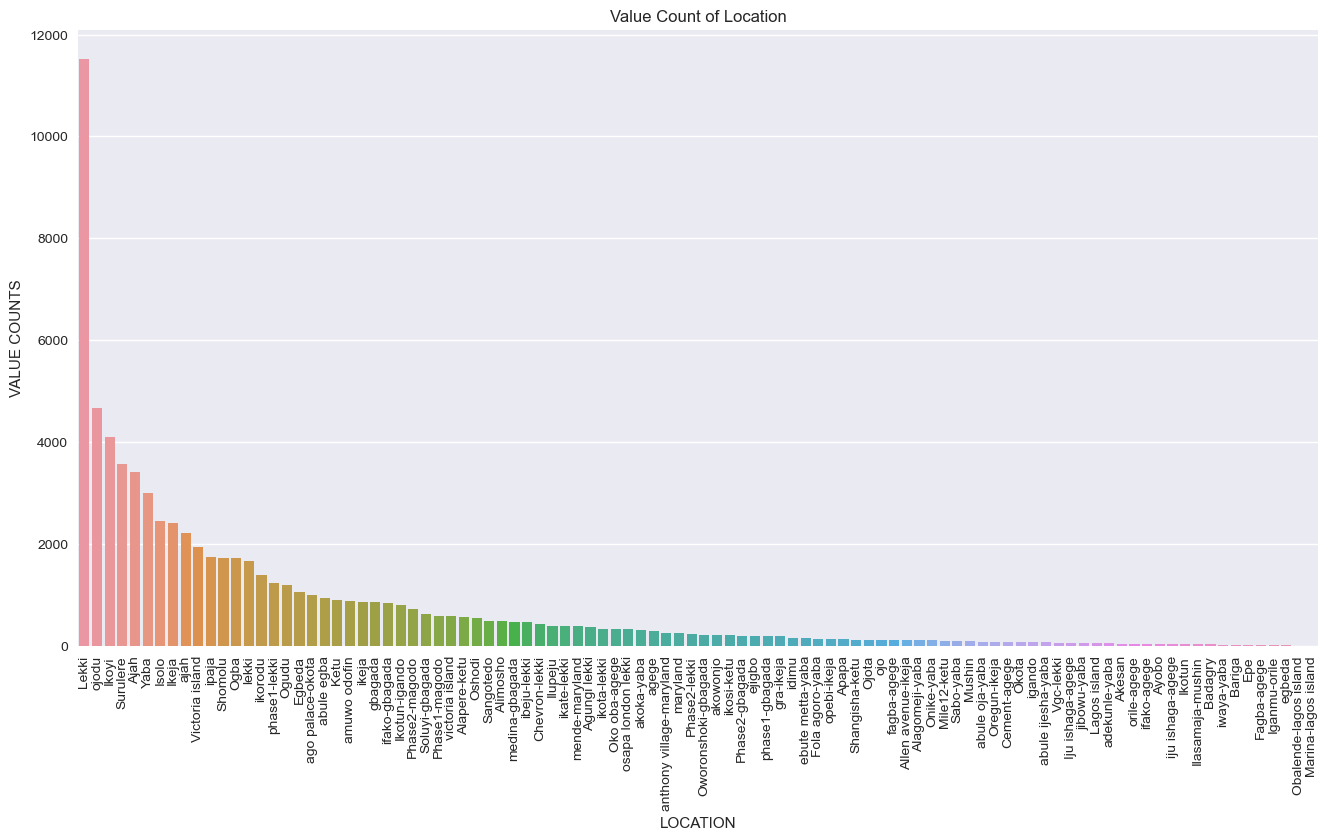

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x=eko3['LOCATION'],ax=ax,order=eko3['LOCATION'].value_counts().index)
ax.set_title('Value Count of Location')
ax.set_xlabel('LOCATION')
ax.set_ylabel('VALUE COUNTS')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

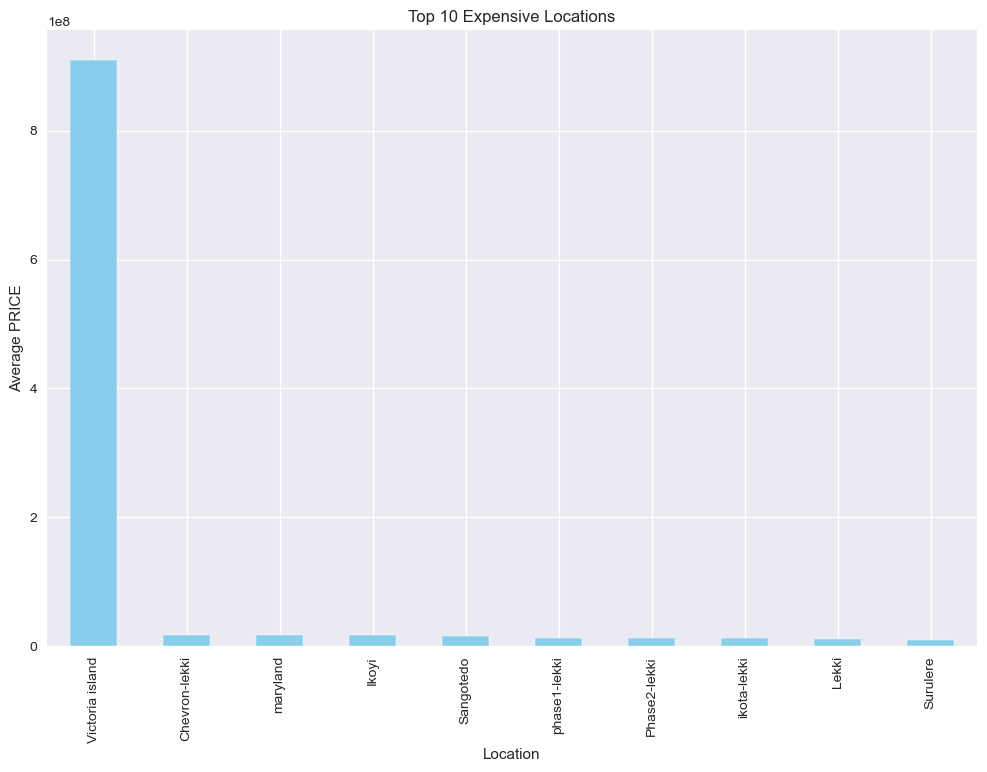

In [204]:
# checking top 10 expensive locations
top_10_expensive_locations = eko3.groupby('LOCATION')['PRICE'].mean().nlargest(10)

plt.figure(figsize=(12, 8))
top_10_expensive_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Expensive Locations')
plt.xlabel('Location')
plt.ylabel('Average PRICE')
plt.xticks(rotation=90)
plt.show()

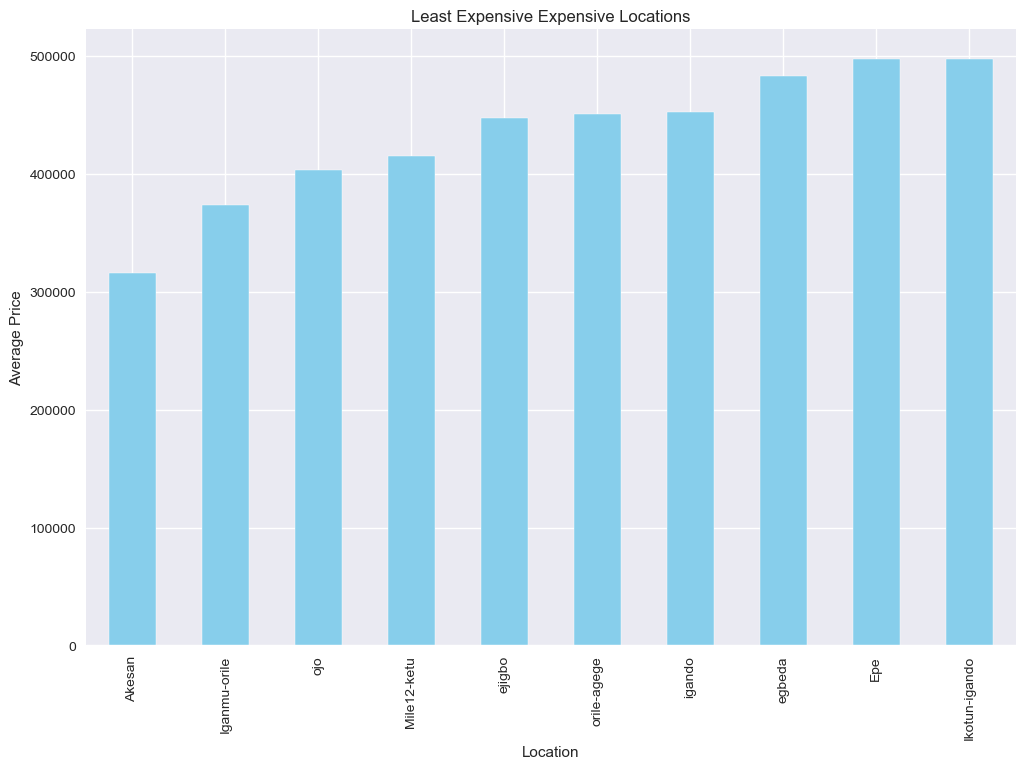

In [205]:
# checking 10 least expensive locations
least_expensive_locations = eko3.groupby('LOCATION')['PRICE'].mean().nsmallest(10)

plt.figure(figsize=(12, 8))
least_expensive_locations.plot(kind='bar', color='skyblue')
plt.title('Least Expensive Expensive Locations')
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

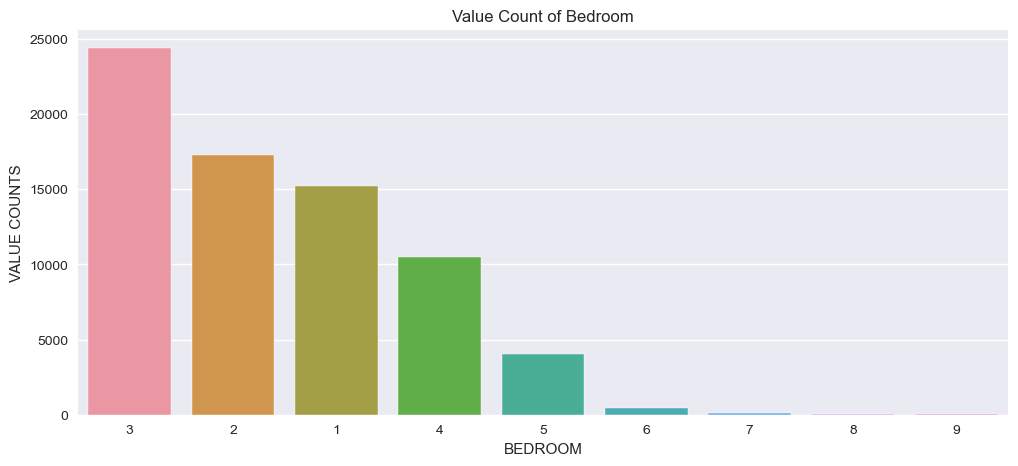

In [206]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x=eko3["BEDROOMS"], ax=ax,order=eko3["BEDROOMS"].value_counts().index)
ax.set_title("Value Count of Bedroom")
ax.set_xlabel("BEDROOM")
ax.set_ylabel("VALUE COUNTS");

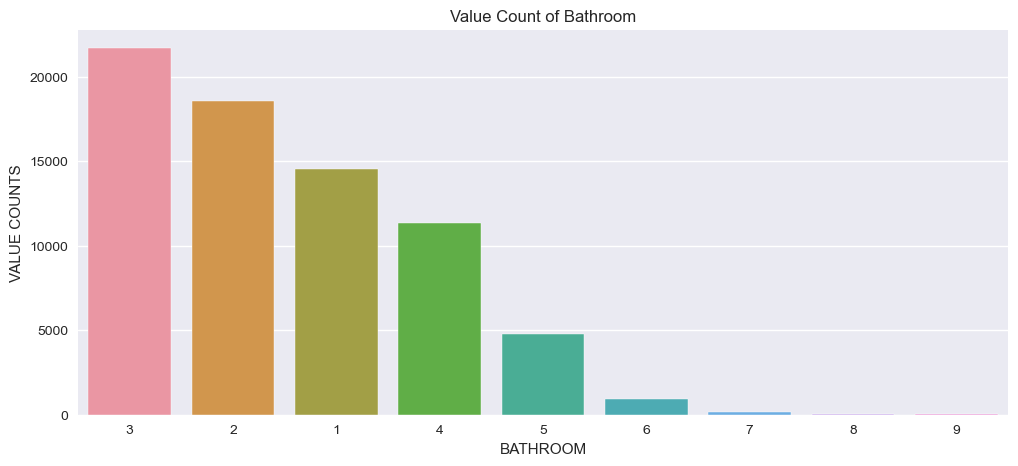

In [207]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x=eko3["BATHROOMS"], ax=ax,order=eko3["BATHROOMS"].value_counts().index)
ax.set_title("Value Count of Bathroom")
ax.set_xlabel("BATHROOM")
ax.set_ylabel("VALUE COUNTS");

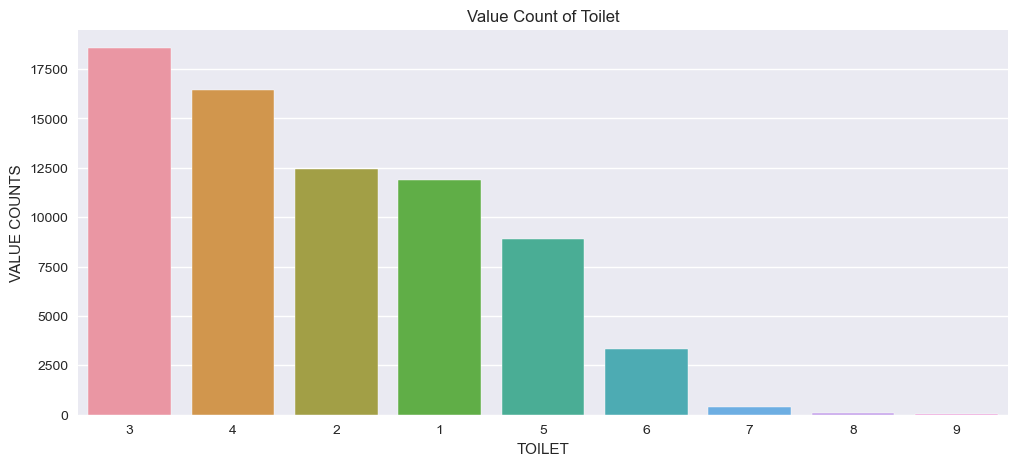

In [208]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x=eko3["TOILETS"], ax=ax,order=eko3["TOILETS"].value_counts().index)
ax.set_title("Value Count of Toilet")
ax.set_xlabel("TOILET")
ax.set_ylabel("VALUE COUNTS");

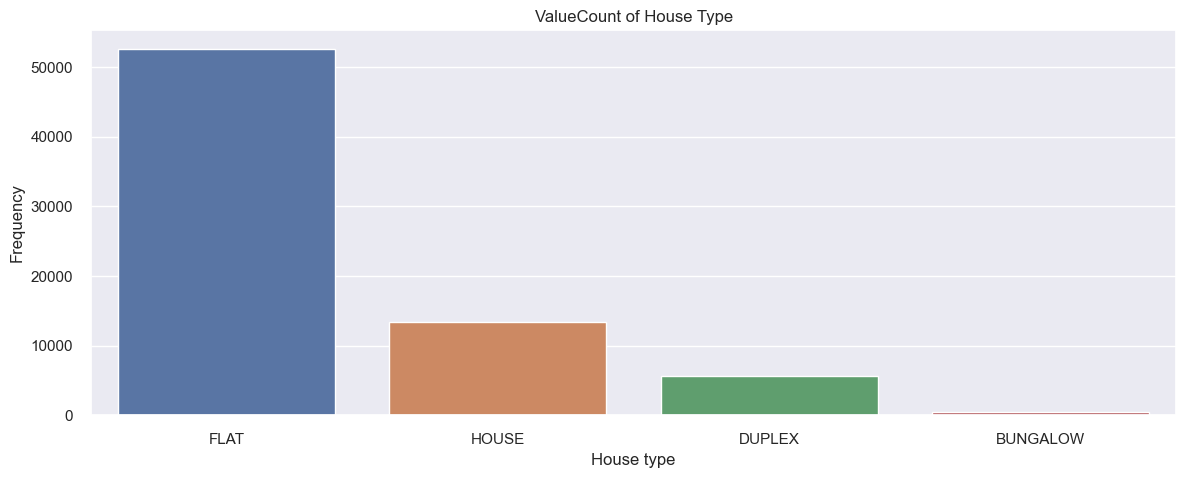

In [209]:
sns.set()
fig,ax = plt.subplots(figsize = (14,5))
location_fr = eko3['HOUSE_TYPE'].value_counts()
ord_frq = location_fr.index
sns.countplot(x = 'HOUSE_TYPE',data=eko3,order = ord_frq)
plt.xlabel('House type')
plt.ylabel('Frequency')
plt.title('ValueCount of House Type');

In [210]:
eko3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72057 entries, 0 to 72095
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    72057 non-null  object 
 1   PRICE       72057 non-null  float64
 2   DATE ADDED  72057 non-null  object 
 3   BEDROOMS    72057 non-null  int64  
 4   BATHROOMS   72057 non-null  int64  
 5   TOILETS     72057 non-null  int64  
 6   HOUSE_TYPE  72057 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 4.4+ MB


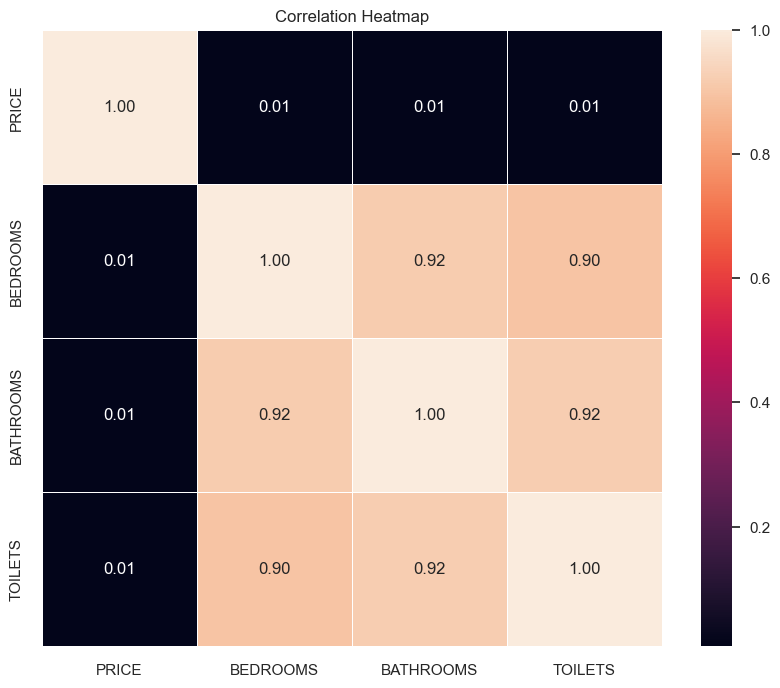

In [211]:
numeric_columns = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'TOILETS']
numeric_data = eko3[numeric_columns]

# Creating a correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature Engineering

In [212]:
eko3.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE
0,Lekki,5000000.0,2022-01-13,4,4,4,DUPLEX
1,lekki,7500000.0,2021-12-09,4,4,4,HOUSE
2,Ikeja,4000000.0,2017-11-24,4,4,5,HOUSE
3,ipaja,450000.0,2022-08-08,2,1,2,FLAT
4,Lekki,3000000.0,2021-08-01,4,4,5,DUPLEX


In [213]:
eko3['LOCATION'] = eko3['LOCATION'].str.capitalize()

In [214]:
eko3.LOCATION.unique()

array(['Lekki', 'Ikeja', 'Ipaja', 'Ojodu', 'Surulere', 'Ikoyi',
       'Onike-yaba', 'Ketu', 'Phase1-lekki', 'Shomolu', 'Amuwo odofin',
       'Ikotun-igando', 'Ajah', 'Sangotedo', 'Yaba', 'Ikorodu', 'Ojota',
       'Ogba', 'Ogudu', 'Phase1-magodo', 'Alagomeji-yaba',
       'Victoria island', 'Osapa london lekki', 'Ago palace-okota',
       'Medina-gbagada', 'Gbagada', 'Egbeda', 'Soluyi-gbagada',
       'Chevron-lekki', 'Phase2-magodo', 'Phase2-gbagada', 'Ikotun',
       'Ifako-gbagada', 'Isolo', 'Alapere-ketu', 'Ojo', 'Agege',
       'Fola agoro-yaba', 'Oregun-ikeja', 'Ikota-lekki', 'Ikate-lekki',
       'Ilupeju', 'Phase2-lekki', 'Oko oba-agege', 'Maryland',
       'Mende-maryland', 'Ikosi-ketu', 'Abule egba', 'Ibeju-lekki',
       'Gra-ikeja', 'Lagos island', 'Akowonjo', 'Apapa', 'Idimu',
       'Opebi-ikeja', 'Mushin', 'Igando', 'Oworonshoki-gbagada',
       'Akoka-yaba', 'Alimosho', 'Sabo-yaba', 'Agungi lekki', 'Oshodi',
       'Ayobo', 'Iju ishaga-agege', 'Allen avenue-ikeja', 'O

In [215]:
LOCATION_dict = {'Victoria island':'Victoria-Island', 
                 'Amuwo odofin':'Amuwo-Odofin',
                 'Vgc-lekki':'VGC-Lekki',
                 'Iganmu-orile':'Iganmu-Orile',
                 'Iwaya-yaba':'Iwaya-Yaba',
                 'Lagos island':'Lagos-Island',
                 'Adekunle-yaba':'Adekunle-Yaba',
                 'Jibowu-yaba':'Jibowu-Yaba',
                 'Onike-yaba':'Onike-Yaba',
                 'Shangisha-ketu':'Shangisha-Ketu',
                 'Ifako-agege':'Ifako-Agege',
                 'Ibeju-lekki':'Ibeju-Lekki',
                 'Fagba-agege':'Fagba-Agege',
                 'Orile-agege':'Orile-Agege',
                 'Soluyi-gbagada':'Soluyi-Gbagada',
                 'Cement-agege':'Cement-Agege',
                 'Oregun-ikeja':'Oregun-Ikeja',
                 'Mile12-ketu':'Mile12-Ketu',
                 'Phase1-lekki':'Phase1-Lekki',
                 'Phase2-lekki':'Phase2-Lekki',
                 'Gra-ikeja':'GRA-Ikeja',
                 'Ikotun-igando':'Ikotun-Igando',
                 'Alagomeji-yaba':'Alagomeji-Yaba',
                 'Opebi-ikeja':'Opebi-Ikeja',
                 'Chevron-lekki':'Chevron-Lekki',
                 'Phase2-gbagada':'Phase2-Gbagada',
                 'Akoka-yaba':'Akoka-Yaba',
                 'Mende-maryland':'Mende-Maryland',
                 'Allen avenue-ikeja':'Allen-Avenue-Ikeja',
                 'Ikota-lekki':'Ikota-Lekki',
                 'Ikate-lekki':'Ikate-Lekki',
                 'Oworonshoki-gbagada':'Oworonshoki-Gbagada',
                 'Oko oba-agege':'Oko-Oba-Agege',
                 'Ifako-gbagada':'Ifako-Gbagada',
                 'Obalende-lagos island':'Obalende-Lagos-Island',
                 'Ikosi-ketu':'Ikosi-Ketu',
                 'Sabo-yaba':'Sabo-Yaba',
                 'Phase1-magodo':'Phase1-Magodo',
                 'Medina-gbagada':'Medina-Gbagada',
                 'Abule egba':'Abule-Egba',
                 'Alapere-ketu':'Alapere-Ketu',
                 'Ilasamaja-mushin':'Ilasamaja-Mushin',
                 'Osapa london lekki':'Osapa-London-Lekki',
                 'Agungi lekki':'Agungi-Lekki',
                 'Allen Avenue-Ikeja':'Allen-Avenue-Ikeja',
                 'Abule oja-yaba':'Abule-Oja-Yaba',
                 'Abule ijesha-yaba':'Abule-Ijesha-Yaba',
                 'Ebute metta-yaba':'Ebute-Metta-Yaba',
                 'Phase1-gbagada':'Phase1-Gbagada',
                 'Phase2-magodo':'Phase2-Magodo',
                 'Fola agoro-yaba':'Fola-Agoro-Yaba',
                 'Ago palace-okota':'Ago-Palace-Okota',
                 'Anthony village-maryland':'Anthony-Village-Maryland',
                 'Iju ishaga-agege':'Iju-Ishaga-Agege',
                 'Marina-lagos island':'Marina-Lagos-Island'}

eko3.replace(LOCATION_dict, inplace=True)

In [216]:
eko3.LOCATION.unique()

array(['Lekki', 'Ikeja', 'Ipaja', 'Ojodu', 'Surulere', 'Ikoyi',
       'Onike-Yaba', 'Ketu', 'Phase1-Lekki', 'Shomolu', 'Amuwo-Odofin',
       'Ikotun-Igando', 'Ajah', 'Sangotedo', 'Yaba', 'Ikorodu', 'Ojota',
       'Ogba', 'Ogudu', 'Phase1-Magodo', 'Alagomeji-Yaba',
       'Victoria-Island', 'Osapa-London-Lekki', 'Ago-Palace-Okota',
       'Medina-Gbagada', 'Gbagada', 'Egbeda', 'Soluyi-Gbagada',
       'Chevron-Lekki', 'Phase2-Magodo', 'Phase2-Gbagada', 'Ikotun',
       'Ifako-Gbagada', 'Isolo', 'Alapere-Ketu', 'Ojo', 'Agege',
       'Fola-Agoro-Yaba', 'Oregun-Ikeja', 'Ikota-Lekki', 'Ikate-Lekki',
       'Ilupeju', 'Phase2-Lekki', 'Oko-Oba-Agege', 'Maryland',
       'Mende-Maryland', 'Ikosi-Ketu', 'Abule-Egba', 'Ibeju-Lekki',
       'GRA-Ikeja', 'Lagos-Island', 'Akowonjo', 'Apapa', 'Idimu',
       'Opebi-Ikeja', 'Mushin', 'Igando', 'Oworonshoki-Gbagada',
       'Akoka-Yaba', 'Alimosho', 'Sabo-Yaba', 'Agungi-Lekki', 'Oshodi',
       'Ayobo', 'Iju-Ishaga-Agege', 'Allen-Avenue-Ikeja', 'O

In [217]:
# creating a column for island districts
LOCATION_dict1 = {'Ajah':'Yes', 'Phase1-Gbagada':'No', 'Surulere':'No', 'Agungi-Lekki':'Yes', 'Alagomeji-Yaba':'No',
                  'Isolo':'No', 'Lekki':'Yes', 'Osapa-London-Lekki':'Yes', 'Ikate-Lekki':'Yes', 'Ibeju-Lekki':'Yes',
                  'Phase1-Lekki':'Yes', 'Mende-Maryland':'No', 'Victoria-Island':'Yes', 'Ikoyi':'Yes',
                  'Ikeja':'No', 'Ikoyi':'Yes', 'Yaba':'No', 'Ilupeju':'No', 'Shomolu':'No',
                  'Ketu':'No', 'Amuwo-Odofin':'No', 'Abule-Egba':'No', 'Oshodi':'No', 'Apapa':'No', 'Ikorodu':'No', 'Ojodu':'No',
                  'Ipaja':'No', 'Egbeda':'No', 'Ikotun':'No', 'Idimu':'No', 'Ogba':'No', 'Igando':'No', 'Akowonjo':'No',
                  'Ikota-Lekki':'Yes', 'Chevron-Lekki':'Yes', 'Phase2-Lekki':'Yes', 'VGC-Lekki':'Yes', 'Opebi-Ikeja':'No',
                  'Allen-Avenue-Ikeja':'No', 'GRA-Ikeja':'No', 'Oregun-Ikeja':'No', 'Akoka-Yaba':'No', 'Adekunle-Yaba':'No',
                  'Abule-Oja-Yaba':'No', 'Abule-Ijesha-Yaba':'No', 'Onike-Yaba':'No', 'Jibowu-Yaba':'No', 'Sabo-Yaba':'No',
                  'Iwaya-Yaba':'No', 'Ebute-Metta-Yaba':'No', 'Fola-Agoro-Yaba':'No', 'Ago-Palace-Okota':'No', 'Okota':'No',
                  'Phase1-Gbagada':'No', 'Phase2-Gbagada':'No', 'Ifako-Gbagada':'No', 'Oworonshoki-Gbagada':'No',
                  'Soluyi-Gbagada':'No', 'Anthony-Village-Maryland':'No', 'Maryland':'No',
                  'Ikotun-Igando':'No', 'Ojo':'No', 'Ayobo':'No', 'Akesan':'No', 'Fagba-Agege':'No', 'Cement-Agege':'No',
                  'Oko-Oba-Agege':'No', 'Ifako-Agege':'No', 'Iju-Ishaga-Agege':'No', 'Orile-Agege':'No', 'Agege':'No',
                  'Marina-Lagos-Island':'Yes', 'Obalende-Lagos-Island':'Yes', 'Ilasamaja-Mushin':'No',
                  'Mushin':'No', 'Phase1-Magodo':'No', 'Phase2-Magodo':'No', 'Ojota':'No', 'Ogudu':'No', 'Epe':'Yes',
                  'Alapere-Ketu':'No', 'Mile12-Ketu':'No', 'Shangisha-Ketu':'No', 'Ikosi-Ketu':'No', 'Alimosho':'No',
                  'Bariga':'No', 'Ejigbo':'No', 'Sangotedo':'Yes', 'Badagry':'No', 'Iganmu-Orile':'No', 'Medina-Gbagada':'No','Lagos-Island':'Yes',
                 'Gbagada':'No'}

eko3['ISLAND'] = eko3['LOCATION'].replace(LOCATION_dict1)

eko3.tail(10)

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,ISLAND
72086,Ajah,1500000.0,2020-03-26,4,4,5,DUPLEX,Yes
72087,Abule-Egba,450000.0,2019-10-14,3,3,3,FLAT,No
72088,Ojodu,350000.0,2019-09-13,1,1,1,FLAT,No
72089,Okota,800000.0,2020-04-13,2,3,3,FLAT,No
72090,Isolo,600000.0,2018-09-17,2,2,2,FLAT,No
72091,Lekki,1000000.0,2022-06-16,1,1,2,FLAT,Yes
72092,Ipaja,800000.0,2021-08-03,2,2,3,FLAT,No
72093,Phase2-Gbagada,900000.0,2021-07-06,3,2,2,FLAT,No
72094,Isolo,800000.0,2020-03-21,3,3,4,FLAT,No
72095,Lekki,5000000.0,2022-07-10,5,5,5,HOUSE,Yes


In [218]:
eko3['LOCATION'].nunique()

91

In [219]:
eko3['ISLAND'].unique()

array(['Yes', 'No'], dtype=object)

In [220]:
# reduce the price range
eko3 = eko3[(eko3['PRICE'] >= 200000) & (eko3['PRICE'] <= 10000000)]

In [221]:
eko3.shape

(67491, 8)

In [222]:
eko3.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,ISLAND
0,Lekki,5000000.0,2022-01-13,4,4,4,DUPLEX,Yes
1,Lekki,7500000.0,2021-12-09,4,4,4,HOUSE,Yes
2,Ikeja,4000000.0,2017-11-24,4,4,5,HOUSE,No
3,Ipaja,450000.0,2022-08-08,2,1,2,FLAT,No
4,Lekki,3000000.0,2021-08-01,4,4,5,DUPLEX,Yes


In [223]:
eko3.duplicated().sum()

373

In [224]:
eko3.drop_duplicates(inplace=True)

In [225]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
eko3['ISLAND'] = label_encoder.fit_transform(eko3['ISLAND'])
eko3.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,ISLAND
0,Lekki,5000000.0,2022-01-13,4,4,4,DUPLEX,1
1,Lekki,7500000.0,2021-12-09,4,4,4,HOUSE,1
2,Ikeja,4000000.0,2017-11-24,4,4,5,HOUSE,0
3,Ipaja,450000.0,2022-08-08,2,1,2,FLAT,0
4,Lekki,3000000.0,2021-08-01,4,4,5,DUPLEX,1


In [226]:
eko3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67118 entries, 0 to 72095
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    67118 non-null  object 
 1   PRICE       67118 non-null  float64
 2   DATE ADDED  67118 non-null  object 
 3   BEDROOMS    67118 non-null  int64  
 4   BATHROOMS   67118 non-null  int64  
 5   TOILETS     67118 non-null  int64  
 6   HOUSE_TYPE  67118 non-null  object 
 7   ISLAND      67118 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 4.4+ MB


In [227]:
eko3['LOCATION'].unique()

array(['Lekki', 'Ikeja', 'Ipaja', 'Ojodu', 'Surulere', 'Onike-Yaba',
       'Ketu', 'Phase1-Lekki', 'Shomolu', 'Amuwo-Odofin', 'Ikotun-Igando',
       'Ajah', 'Sangotedo', 'Ojota', 'Ogba', 'Ogudu', 'Phase1-Magodo',
       'Ikorodu', 'Alagomeji-Yaba', 'Victoria-Island',
       'Osapa-London-Lekki', 'Ago-Palace-Okota', 'Medina-Gbagada', 'Yaba',
       'Ikoyi', 'Gbagada', 'Egbeda', 'Soluyi-Gbagada', 'Chevron-Lekki',
       'Phase2-Magodo', 'Phase2-Gbagada', 'Ikotun', 'Ifako-Gbagada',
       'Isolo', 'Alapere-Ketu', 'Ojo', 'Agege', 'Fola-Agoro-Yaba',
       'Oregun-Ikeja', 'Ikota-Lekki', 'Ikate-Lekki', 'Ilupeju',
       'Phase2-Lekki', 'Oko-Oba-Agege', 'Maryland', 'Mende-Maryland',
       'Ikosi-Ketu', 'Abule-Egba', 'Ibeju-Lekki', 'GRA-Ikeja',
       'Lagos-Island', 'Akowonjo', 'Apapa', 'Idimu', 'Opebi-Ikeja',
       'Igando', 'Oworonshoki-Gbagada', 'Akoka-Yaba', 'Alimosho',
       'Sabo-Yaba', 'Agungi-Lekki', 'Oshodi', 'Ayobo', 'Iju-Ishaga-Agege',
       'Allen-Avenue-Ikeja', 'Okota', 'Ak

In [228]:
my_dict = {}

In [229]:
for i, y in enumerate(list(eko3['LOCATION'].unique())):
    my_dict[y] = i

In [230]:
my_dict

{'Lekki': 0,
 'Ikeja': 1,
 'Ipaja': 2,
 'Ojodu': 3,
 'Surulere': 4,
 'Onike-Yaba': 5,
 'Ketu': 6,
 'Phase1-Lekki': 7,
 'Shomolu': 8,
 'Amuwo-Odofin': 9,
 'Ikotun-Igando': 10,
 'Ajah': 11,
 'Sangotedo': 12,
 'Ojota': 13,
 'Ogba': 14,
 'Ogudu': 15,
 'Phase1-Magodo': 16,
 'Ikorodu': 17,
 'Alagomeji-Yaba': 18,
 'Victoria-Island': 19,
 'Osapa-London-Lekki': 20,
 'Ago-Palace-Okota': 21,
 'Medina-Gbagada': 22,
 'Yaba': 23,
 'Ikoyi': 24,
 'Gbagada': 25,
 'Egbeda': 26,
 'Soluyi-Gbagada': 27,
 'Chevron-Lekki': 28,
 'Phase2-Magodo': 29,
 'Phase2-Gbagada': 30,
 'Ikotun': 31,
 'Ifako-Gbagada': 32,
 'Isolo': 33,
 'Alapere-Ketu': 34,
 'Ojo': 35,
 'Agege': 36,
 'Fola-Agoro-Yaba': 37,
 'Oregun-Ikeja': 38,
 'Ikota-Lekki': 39,
 'Ikate-Lekki': 40,
 'Ilupeju': 41,
 'Phase2-Lekki': 42,
 'Oko-Oba-Agege': 43,
 'Maryland': 44,
 'Mende-Maryland': 45,
 'Ikosi-Ketu': 46,
 'Abule-Egba': 47,
 'Ibeju-Lekki': 48,
 'GRA-Ikeja': 49,
 'Lagos-Island': 50,
 'Akowonjo': 51,
 'Apapa': 52,
 'Idimu': 53,
 'Opebi-Ikeja': 54,
 

In [231]:
location_dict = my_dict

In [232]:
new_dict = eko3['HOUSE_TYPE'].value_counts().to_dict()

In [233]:
new_dict

{'FLAT': 49726, 'HOUSE': 11958, 'DUPLEX': 5035, 'BUNGALOW': 399}

In [234]:
house_dict = {'FLAT': 1, 'HOUSE':2, 'DUPLEX':3, 'BUNGALOW':4}

In [235]:
eko3["HOUSE_TYPE"] = eko3.HOUSE_TYPE.map(house_dict)
eko3["LOCATION"] = eko3.LOCATION.map(location_dict)

In [236]:
eko3.head()

,LOCATION,PRICE,DATE ADDED,BEDROOMS,BATHROOMS,TOILETS,HOUSE_TYPE,ISLAND
0,0,5000000.0,2022-01-13,4,4,4,3,1
1,0,7500000.0,2021-12-09,4,4,4,2,1
2,1,4000000.0,2017-11-24,4,4,5,2,0
3,2,450000.0,2022-08-08,2,1,2,1,0
4,0,3000000.0,2021-08-01,4,4,5,3,1


### Machine Learning

In [241]:
x = eko3[['LOCATION', 'BEDROOMS', 'BATHROOMS', 'TOILETS', 'HOUSE_TYPE', 'ISLAND']]
y = eko3['PRICE']

# Split the data into training, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=0)

#### Linear Regression

In [242]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_linear = linear_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_linear = mean_squared_error(y_val, y_val_pred_linear)
r2_val_linear = r2_score(y_val, y_val_pred_linear)

print("Linear Regression:")
print(f"Validation Mean Squared Error: {mse_val_linear}")
print(f"Validation R-squared: {r2_val_linear}")

Linear Regression:
Validation Mean Squared Error: 2127772754121.524
Validation R-squared: 0.4843964067790688


#### XGBoost

In [243]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgboost_model = XGBRegressor()

# Train the model
xgboost_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_xgboost = xgboost_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_xgboost = mean_squared_error(y_val, y_val_pred_xgboost)
r2_val_xgboost = r2_score(y_val, y_val_pred_xgboost)

print("XGBoost:")
print(f"Validation Mean Squared Error: {mse_val_xgboost}")
print(f"Validation R-squared: {r2_val_xgboost}")

XGBoost:
Validation Mean Squared Error: 1053969551218.2012
Validation R-squared: 0.7446012565482264


#### Decision Tree

In [244]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor()

# Train the model
decision_tree_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_dt = decision_tree_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_val_dt = r2_score(y_val, y_val_pred_dt)

print("Decision Tree:")
print(f"Validation Mean Squared Error: {mse_val_dt}")
print(f"Validation R-squared: {r2_val_dt}")

Decision Tree:
Validation Mean Squared Error: 1126543581119.8596
Validation R-squared: 0.7270150596579164


#### Random Forest

In [245]:
# Initialize the Random Forest model
random_forest_model = RandomForestRegressor()

# Train the model
random_forest_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_rf = random_forest_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

print("Random Forest:")
print(f"Validation Mean Squared Error: {mse_val_rf}")
print(f"Validation R-squared: {r2_val_rf}")

Random Forest:
Validation Mean Squared Error: 1072810593628.8113
Validation R-squared: 0.7400356801030343


#### Nearest Neigbour Regressor

In [246]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the k-Nearest Neighbors model
knn_model = KNeighborsRegressor()

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_knn = knn_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_knn = mean_squared_error(y_val, y_val_pred_knn)
r2_val_knn = r2_score(y_val, y_val_pred_knn)

print("k-Nearest Neighbors:")
print(f"Validation Mean Squared Error: {mse_val_knn}")
print(f"Validation R-squared: {r2_val_knn}")

k-Nearest Neighbors:
Validation Mean Squared Error: 1205550052024.2817
Validation R-squared: 0.7078701485262558


#### Ridge Regression

In [247]:
# Initialize the Ridge Regression model
ridge_model = Ridge()

# Train the model
ridge_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_ridge = ridge_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_ridge = mean_squared_error(y_val, y_val_pred_ridge)
r2_val_ridge = r2_score(y_val, y_val_pred_ridge)

print("Ridge Regression:")
print(f"Validation Mean Squared Error: {mse_val_ridge}")
print(f"Validation R-squared: {r2_val_ridge}")

Ridge Regression:
Validation Mean Squared Error: 2127771567509.2563
Validation R-squared: 0.4843966943199012


In [248]:
def evaluate_model(model, x, y, set_name):
    y_pred = model.predict(x)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{set_name} Mean Squared Error: {mse}")
    print(f"{set_name} R-squared: {r2}")

# Evaluate models on the validation set
evaluate_model(linear_model, x_val, y_val, "Linear Regression")
evaluate_model(ridge_model, x_val, y_val, "Ridge Regression")
evaluate_model(random_forest_model, x_val, y_val, "Random Forest")
evaluate_model(xgboost_model, x_val, y_val, "XGBoost")
evaluate_model(decision_tree_model, x_val, y_val, "Decision Tree")
evaluate_model(knn_model, x_val, y_val, "KNN")

Linear Regression Mean Squared Error: 2127772754121.524
Linear Regression R-squared: 0.4843964067790688
Ridge Regression Mean Squared Error: 2127771567509.2563
Ridge Regression R-squared: 0.4843966943199012
Random Forest Mean Squared Error: 1072810593628.8113
Random Forest R-squared: 0.7400356801030343
XGBoost Mean Squared Error: 1053969551218.2012
XGBoost R-squared: 0.7446012565482264
Decision Tree Mean Squared Error: 1126543581119.8596
Decision Tree R-squared: 0.7270150596579164
KNN Mean Squared Error: 1205550052024.2817
KNN R-squared: 0.7078701485262558


### Model Improvement

In [249]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost model
xgboost_model = XGBRegressor()

# Define a grid of hyperparameter values to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train_val, y_train_val)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Re-initialize the XGBoost model with the best hyperparameters
best_xgboost_model = XGBRegressor(**best_params)

# Train the model with the best hyperparameters on the entire training-validation set
best_xgboost_model.fit(x_train_val, y_train_val)

# Make predictions on the test set
y_test_pred_xgboost = best_xgboost_model.predict(x_test)

# Evaluate the model on the test set
mse_test_xgboost = mean_squared_error(y_test, y_test_pred_xgboost)
r2_test_xgboost = r2_score(y_test, y_test_pred_xgboost)

print("Best XGBoost Model:")
print(f"Test Mean Squared Error: {mse_test_xgboost}")
print(f"Test R-squared: {r2_test_xgboost}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGBoost Model:
Test Mean Squared Error: 1112180666495.5332
Test R-squared: 0.734193863305584


In [254]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost model
xgboost_model = XGBRegressor()

# Define the hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Re-initialize the XGBoost model with the best hyperparameters
best_xgboost_model = XGBRegressor(**best_params)

# Train the model with the best hyperparameters on the entire training set
best_xgboost_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred_xgboost = best_xgboost_model.predict(x_val)

# Evaluate the model on the validation set
mse_val_xgboost = mean_squared_error(y_val, y_val_pred_xgboost)
r2_val_xgboost = r2_score(y_val, y_val_pred_xgboost)

print("XGBoost with Hyperparameter Tuning:")
print(f"Validation Mean Squared Error: {mse_val_xgboost}")
print(f"Validation R-squared: {r2_val_xgboost}")

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
XGBoost with Hyperparameter Tuning:
Validation Mean Squared Error: 1043106590829.1779
Validation R-squared: 0.7472335777858905


In [255]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost model
xgboost_model = XGBRegressor()

# Train the untuned model on the training set
xgboost_model.fit(x_train, y_train)

# Make predictions on the test set
y_test_pred_untuned = xgboost_model.predict(x_test)

# Evaluate the untuned model on the test set
mse_test_untuned = mean_squared_error(y_test, y_test_pred_untuned)
r2_test_untuned = r2_score(y_test, y_test_pred_untuned)

print("Untuned XGBoost on Test Set:")
print(f"Test Mean Squared Error: {mse_test_untuned}")
print(f"Test R-squared: {r2_test_untuned}")

Untuned XGBoost on Test Set:
Test Mean Squared Error: 1121722347016.33
Test R-squared: 0.7319134449228433


In [256]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume best_params contains the optimal hyperparameters from the hyperparameter tuning process
best_xgboost_model = XGBRegressor(**best_params)

# Train the hyperparameter-tuned model on the validation set
best_xgboost_model.fit(x_val, y_val)

# Make predictions on the validation set
y_val_pred_tuned = best_xgboost_model.predict(x_val)

# Evaluate the hyperparameter-tuned model on the validation set
mse_val_tuned = mean_squared_error(y_val, y_val_pred_tuned)
r2_val_tuned = r2_score(y_val, y_val_pred_tuned)

print("Hyperparameter-Tuned XGBoost on Validation Set:")
print(f"Validation Mean Squared Error: {mse_val_tuned}")
print(f"Validation R-squared: {r2_val_tuned}")

Hyperparameter-Tuned XGBoost on Validation Set:
Validation Mean Squared Error: 938590993659.2649
Validation R-squared: 0.7725598807682252


In [258]:
# Save the trained model to a pickle file using joblib.dump
import joblib
model_filename = 'best_xgboost_model.pkl'
joblib.dump(best_xgboost_model, model_filename)

['best_xgboost_model.pkl']